In [ ]:
# Warmup 0: We've seen these before!
import pandas as pd
import requests
import csv
import os

# AutomateTheBoringStuff
def process_csv(filename):
    file = open(filename, encoding="utf-8")  
    reader = csv.reader(file) 
    data = list(reader)        
    file.close()  
    return data

In [ ]:
# Warmup 1: Review the code below!
url = "https://api.weather.gov/gridpoints/MKX/37,63/forecast"
r = requests.get(url)
r.raise_for_status()
weather_data = r.json()
weather_df = pd.DataFrame(weather_data["properties"]["periods"])
weather_df

In [ ]:
# Warmup 2a: How many of the days is the wind direction E?
len(weather_df[weather_df["windDirection"] == 'E'])

In [ ]:
# Warmup 2b: How many of the days is the wind direction E, NE, or SE?
len(weather_df[(weather_df["windDirection"] == 'E') | (weather_df["windDirection"] == 'NE') | (weather_df["windDirection"] == 'SE')])

In [ ]:
# Warmup 3: Of the daytime periods, what percentage are cloudy?
daytime_forecasts = weather_df[weather_df["isDaytime"]]
num_cloudy = len(daytime_forecasts[daytime_forecasts["shortForecast"].str.lower().str.contains("cloudy")])
(num_cloudy / len(daytime_forecasts)) * 100

In [ ]:
# Warmup 4a: Of the days where the temperature is above freezing, what is the wind speed forecast?
winds = weather_df[weather_df["temperature"] > 32]["windSpeed"]
winds

In [ ]:
# Warmup 4b: ... and what was the maximum predicted wind speed?
better_winds = winds.str[:-4]
best_winds = better_winds.apply(lambda wind : int(wind) if " to " not in wind else int(wind.split(" to ")[1]))
best_winds.max()

# Lecture 30: Web 2 - Generating HTML

Learning Objectives:

- Type by hand a basic HTML page with a list, a link, and a table
- Convert a Python list into an HTML unordered list
- Convert a Python dictionary of URLs into an HTML of hyperlinks
- Convert a Pandas DataFrame into an HTML table

### Part A: Type by hand a basic HTML page with a list, a link, and a table

Markdown and Jupyter Notebook will recognize HTML tags.

`esc` -> `m`

Otherwise, "Cell" -> "Cell Type" -> "Markdown"

### Practice the following tags in the cell below: 
 - h#
 - p
 - i
 - b
 - br
 - img

<i>Make a new Jupyter Notebook text file in this directory.</i>
<p> The head, body, and html tags are not necessary 
for a browser to read a file.</p>

<h2> Happy Friday!! </h2>

<p>It's going to be a <b>fun</b> day <br><br><br></p>

<p>Note that br does not have a close tag<p>
    
<img src="https://www.python.org/static/img/python-logo@2x.png">

### Hyperlink tags have an anchor tag and a href attribute
`a`: anchor

`href=` : hyper references 

Cole's favorite restaurant on campus is 
<a href="https://union.wisc.edu/dine/find-food-and-drink/ginger-root/">Ginger Root</a>

### Unordered List Tags
`ul` : starts an unordered list

`li` : add a list item
Un-ordered list example:

<h6>Favorite Campus Buildings</h6>
<ul>
    <li>WIDS</li>
    <li>Education</li>
    <li>The Nick</li>
</ul>

### HTML Table Tags

`table`: start and end of a table

`tr`: start and end of a new row

`th`: a cell in the top row ... is bold

`td`: a cell inside a row

Add a few rows to the table below:

<table>
  <tr>
    <th>State</th>
    <th>Capital City</th>
  </tr>
  <tr>
    <td>Wisconsin</td>
    <td>Madison</td>
  </tr>
  <tr>
    <td>Indiana</td>
    <td>Indianapolis</td>
  </tr>
   <tr>
    <td>Illinois</td>
    <td>Springfield</td>
  </tr>
</table>

### Part B: Convert a Python list into an HTML unordered list

Given:  

`health_tips = ["Eat Healthy", "Exercise", "Relax", "Sleep"]`
    
Convert this Python list into a HTML ordered list:

<ul>
    <li>Eat Healthy</li>      
       <li>Exercise</li>
  <li>Relax</li>
       <li>Sleep</li>
</ul> 

In [ ]:
def list_to_html(my_list, path):
    # print(path)
    # open the file for writing
    f = open(path, "w")
    
    # write the <ul> and \n
    f.write("<ul>\n")
    
    # write each item in the list with a \n after each </li>
    for item in my_list:
        f.write("<li>" + item + "</li>\n")

    # write the </ul> and \n
    f.write("</ul>\n")
    
    # close the file
    f.close()
    
todo_list = ["Eat Healthy", "Exercise", "Relax", "Sleep"]
list_to_html(todo_list, "todolist.html")

# Check that you made your document!

### Part C. Convert a Dictionary of Web Site Name, URL into a HTML page of hyperlinks

In [ ]:
fav_sites = {
    "National Weather Service": "http://weather.gov",
    "Short Stack Eatery": "https://shortstackeats.com/",
}

In [ ]:
# Turn fav_sites into a string of many links!
html_string = ''
for key in fav_sites:
    html_string += '<a href="' + fav_sites[key] + '">' + key + '</a><br>\n'
print(html_string)
        

Paste your code in the markdown cell below to test it!

<a href="http://weather.gov">National Weather Service</a><br><a href="https://shortstackeats.com/">Short Stack Eatery</a><br>

In [ ]:
# Now that we know it works, open a file for writing and write the string to a file
f = open("mylinks.html", "w")
f.write(html_string)
f.close()

In [ ]:
# Create your own html document using any of the below!
my_favorite_sports = ["running", "eating", "biking"]
my_favorite_color = "blanchedalmond"
good_numbers = [3, 7, 27, 98]

some_scores = {
    "Bob": 23,
    "Alice": 47,
    "Theresa": 12,
    "Daniel": 4,
    "Lincoln": 11,
    "Liz": 19
}

adoptable_cats = [
    "https://g.petango.com/photos/2627/cb1e90e0-1c10-471a-95d5-107a35156eae.jpg",
    "https://g.petango.com/photos/2627/fc87cde4-b761-4b99-9ea1-40df4e42de3c.jpg",
]

adoptable_cats_with_names = [
    {"name": "leo", "imglink": "https://g.petango.com/photos/2627/cb1e90e0-1c10-471a-95d5-107a35156eae.jpg"},
    {"name": "peach", "imglink": "https://g.petango.com/photos/2627/fc87cde4-b761-4b99-9ea1-40df4e42de3c.jpg"},
]

# Alternatively, fetch data from https://cs571.org/api/f23/hw5/buds
# Image IDs are relative to https://raw.githubusercontent.com/CS571-F23/hw5-api-static-content/main/cats/

In [ ]:
f = open("cats.html", "w")
f.write('<h1>Adoptable Cats!</h1>')
for cat in adoptable_cats_with_names:
    f.write('<h2>{}</h2>\n'.format(cat["name"]))
    f.write('<img src="{}">\n'.format(cat["imglink"]))
f.close()

In [ ]:
url = "https://cs571.org/api/f23/hw5/buds"
r = requests.get(url)
r.raise_for_status()
cat_data = r.json()

f = open("all_cats.html", "w")
f.write('<h1>All Adoptable Cats!</h1>')
for cat in cat_data:
    years = cat["age"] // 12
    months = cat["age"] % 12
    f.write('<h2>{}</h2>\n'.format(cat["name"]))
    f.write('<p>{} years and {} months old</p>\n'.format(years, months))
    f.write('<img src="{}">\n'.format("https://raw.githubusercontent.com/CS571-F23/hw5-api-static-content/main/cats/" + cat["imgIds"][0]))
f.close()



### Part D:  Convert a Pandas Data Frame into a HTML table
Is there an easy way to make a HTML table?

Yes, Pandas has a DataFrame method `.to_html()`


In [ ]:
# Load from the new_movie_data.csv file into a dataframe called "movies"
movies = pd.read_csv("new_movie_data.csv")
movies

In [ ]:
# Convert the movies DataFrame to html using .to_html()
movies_html = movies.to_html()
movies_html

In [ ]:
# Write it to a file
f = open("movies_table.html", "w")
f.write(movies_html)
f.close()

### Demo: CSV File to Webpages

In [ ]:
# Read in the reviews.csv file
amazon_csv = process_csv("reviews.csv")
header = amazon_csv[0]
reviews = amazon_csv[1:]
reviews[1]

In [ ]:
# Create the folder "data" if it does not already exist.
if not os.path.exists("data"):
    os.mkdir("data")

#### Example Review Page

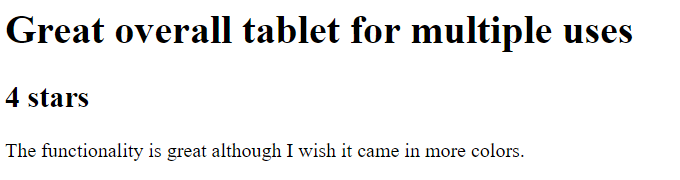

In [ ]:
# Get the HTML data for a single review page
def get_amazon_review_html(review_data):
    review_id = review_data[0] # should use header.index for these!
    title = review_data[1]
    text = review_data[2]
    rating = review_data[3]
    
    html_review = ""
    html_review += "<h1>{}</h1>\n".format(title)
    html_review += "<h2>{} stars</h2>\n".format(rating)
    html_review += "<p>{}</p>\n".format(text)
    return html_review

In [ ]:
# Use get_amazon_review_html to write to "my_review.html" for any random review
html_file = open("my_review.html", "w")
amazon_review_html = get_amazon_review_html(reviews[2])
html_file.write(amazon_review_html)
html_file.close()

In [ ]:
# For each Amazon review, write to a file data/<id>.html ; e.g. data/3966.html.
for amazon_review in reviews:
    amazon_review_id = amazon_review[0] # should use header.index
    html_file = open(os.path.join("data", amazon_review_id + ".html"), "w")
    amazon_review_html = get_amazon_review_html(amazon_review)
    html_file.write(amazon_review_html)
    html_file.close()

#### Example Parent Page


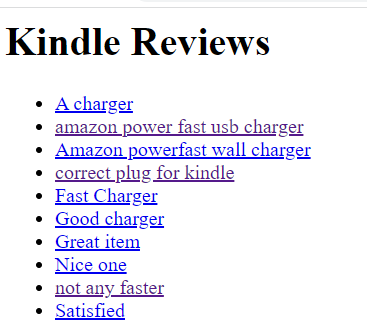

Hint: We can create a link to a child page by formatting the code...

`<li><a href = "{}">{}</a></li>\n`

In [ ]:
# Create a parent page that is an unordered list with links to each review.
parent_html = ""
parent_html += "<h1>Kindle Reviews</h1>\n"
parent_html += "<ul>\n"
for amazon_review in reviews:
    amazon_review_id = amazon_review[0] # should use header.index for these
    amazon_review_title = amazon_review[1]
    
    path_to_review = os.path.join("data", amazon_review_id + ".html")
    review_link = '<li><a href = "{}">{}</a></li>\n'.format(path_to_review, amazon_review_title)
    parent_html += review_link
parent_html += "</ul>\n"

all_reviews_file = open("all_reviews.html", "w")
all_reviews_file.write(parent_html)
all_reviews_file.close()

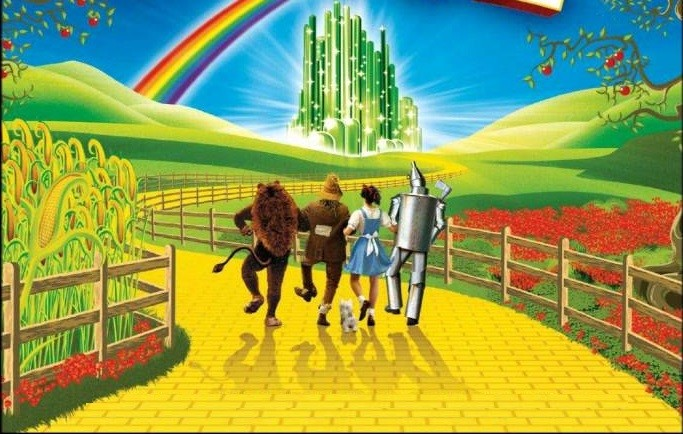

### Nefarious HTML Generation

It's a Friday! This is just a fun thought experiment. For this lecture, we have choosen the "happy path" for generating HTML. How could a nefarious actor abuse the code we made?

In [ ]:
list_to_html(["hey", "hi", "<h3>hello world</h3>"], "oops1.html")

In [ ]:
list_to_html(["hey", "hi", "<script>alert(0)</script>"], "oops2.html")

In [ ]:
list_to_html(["hey", "hi", "<script>alert(localStorage.getItem('ssn') + '--> server')</script>"], "oops3.html")